## Exploratory Data Analysis on Twitter Headlines

In [16]:
# Basics 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Python support modules
import re
import string
import datetime
import pickle 
from collections import Counter

# Spacy
import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en.stop_words import STOP_WORDS
#import en_core_web_lg

# NLTK
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import words, stopwords, wordnet
from nltk import FreqDist
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Helper functions in py file
from preprocessing_tweets import cleaned_tweet
import 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Tara8082/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
with open('/Users/Tara8082/GIT/ProjectGIT/Project_4/headlines_cleaned.pkl', 'rb') as read_file:
    headlines = pickle.load(read_file)

In [10]:
headlines.head()

,content,clean_content
0,"Biden leads Trump among Hispanic voters, 62% t...",biden leads trump among hispanic voters to a w...
1,“We can’t keep up with the laundry.” Covid-19 ...,we can t keep up with the laundry covid has...
2,A large English study showed the number of peo...,a large english study showed the number of peo...
3,"The leaders of Microsoft, Coca-Cola, American ...",the leaders of microsoft coca cola american ai...
4,"After seven months of isolation, the pull of g...",after seven months of isolation the pull of ge...


In [19]:
words = " ".join(headlines.clean_content.values).split()

In [75]:
text = " ".join(line for line in headlines.clean_content)
print("There are {} words in the combination of all review.".format(len(text)))


There are 67759769 words in the combination of all review.


In [20]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

list

In [61]:
# Open list of twitter stop words
with open('stopwords.txt') as fp:
    # 1. iterate over file line-by-line
    # 2. strip line of newline symbols
    # 3. split line by spaces into list (of number strings)
    # 4. convert to string
    # 5. convert map object to list
    stopwords_data = [list(map(str, line.strip().split(' '))) for line in fp]

In [69]:
flat_stopwords_data = [item for sublist in stopwords_data for item in sublist]
stopwords = list(STOPWORDS) + flat_stopwords_data

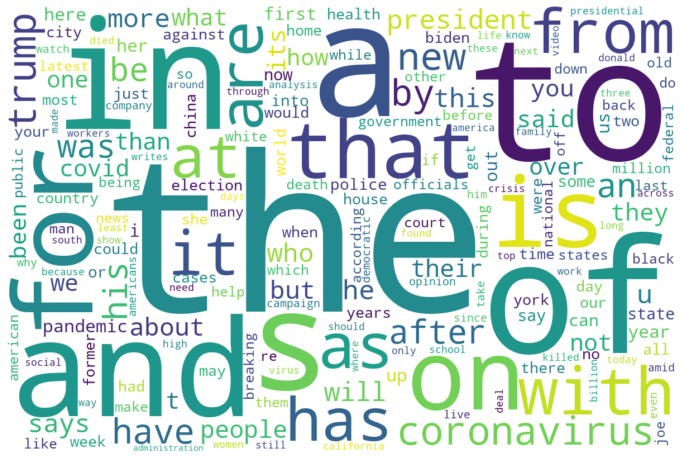

In [74]:
raw_fdist = FreqDist(words)

stopwords = set(stopwords)
stopwords.update(["the"])

wc = WordCloud(stopwords = stopwords, width=1200, height=800, max_words=200, background_color = 'white').generate_from_frequencies(raw_fdist)
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()